In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.metrics import roc_curve, auc


In [38]:
data = pd.read_csv('bank-additional/bank-additional-full.csv')

# Pre-process data
# split the data with different category 
label = ['age','job',"marital","education","default","housing","loan","contact","month","day_of_week","duration","campaign","pdays","previous","poutcome","emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed","y"]
for i in data:
    value = data[i][:].str.split(';')

for i in range(len(value)):
    for j in range(len(value[i])):
        if '"' in value[i][j]:
            value[i][j] = value[i][j][1:-1]

0        [56, housemaid, married, basic.4y, no, no, no,...
1        [57, services, married, high.school, unknown, ...
2        [37, services, married, high.school, no, yes, ...
3        [40, admin., married, basic.6y, no, no, no, te...
4        [56, services, married, high.school, no, no, y...
5        [45, services, married, basic.9y, unknown, no,...
6        [59, admin., married, professional.course, no,...
7        [41, blue-collar, married, unknown, unknown, n...
8        [24, technician, single, professional.course, ...
9        [25, services, single, high.school, no, yes, n...
10       [41, blue-collar, married, unknown, unknown, n...
11       [25, services, single, high.school, no, yes, n...
12       [29, blue-collar, single, high.school, no, no,...
13       [57, housemaid, divorced, basic.4y, no, yes, n...
14       [35, blue-collar, married, basic.6y, no, yes, ...
15       [54, retired, married, basic.9y, unknown, yes,...
16       [35, blue-collar, married, basic.6y, no, yes, .

In [39]:
temp = []
for index in range(len(value)):
    index = pd.DataFrame({label[i]: [value[index][i]] for i in range(len(label))})
    temp.append(index)

result = pd.concat(temp, ignore_index=True)

In [40]:
result.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [41]:
result.to_csv('original_data.csv')

In [43]:
missing_list = []
for i in range(len(result.index)):
    if 'unknown' in result.iloc[i].values:
        missing_list.append(i)

In [103]:
# Remove missing data column
purify_data = result.drop(missing_list)
purify_data.to_csv('handle_data.csv')
purify_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [2]:
data = pd.read_csv('dataset/handle_data.csv')
data.head()

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,2,37,services,married,high.school,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,3,40,admin.,married,basic.6y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,4,56,services,married,high.school,no,no,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,6,59,admin.,married,professional.course,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# Transform label to numer
LabelEncoder = LabelEncoder()
for label in data.columns:
    data[label]= LabelEncoder.fit_transform(data[label])

data.describe()

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,30488.00000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,...,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000
mean,15243.50000,22.029749,3.716708,1.193191,3.842791,0.000098,0.541885,0.156389,0.329474,4.249442,...,1.520959,24.182400,0.194273,0.925544,6.336296,13.705261,10.227204,248.203523,7.656521,0.126574
std,8801.27184,10.332175,3.612755,0.623663,1.988911,0.009919,0.498251,0.363230,0.470030,2.383742,...,2.713405,3.936855,0.522788,0.383466,2.872345,5.641292,6.119740,71.360013,2.564592,0.332501
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7621.75000,14.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,25.000000,0.000000,1.000000,3.000000,10.000000,6.000000,210.000000,6.000000,0.000000
50%,15243.50000,20.000000,2.000000,1.000000,3.000000,0.000000,1.000000,0.000000,0.000000,4.000000,...,1.000000,25.000000,0.000000,1.000000,8.000000,13.000000,8.000000,284.000000,8.000000,0.000000
75%,22865.25000,28.000000,7.000000,2.000000,6.000000,0.000000,1.000000,0.000000,1.000000,6.000000,...,2.000000,25.000000,0.000000,1.000000,9.000000,18.000000,16.000000,303.000000,10.000000,0.000000
max,30487.00000,75.000000,10.000000,2.000000,6.000000,1.000000,1.000000,1.000000,1.000000,9.000000,...,40.000000,25.000000,7.000000,2.000000,9.000000,25.000000,25.000000,313.000000,10.000000,1.000000


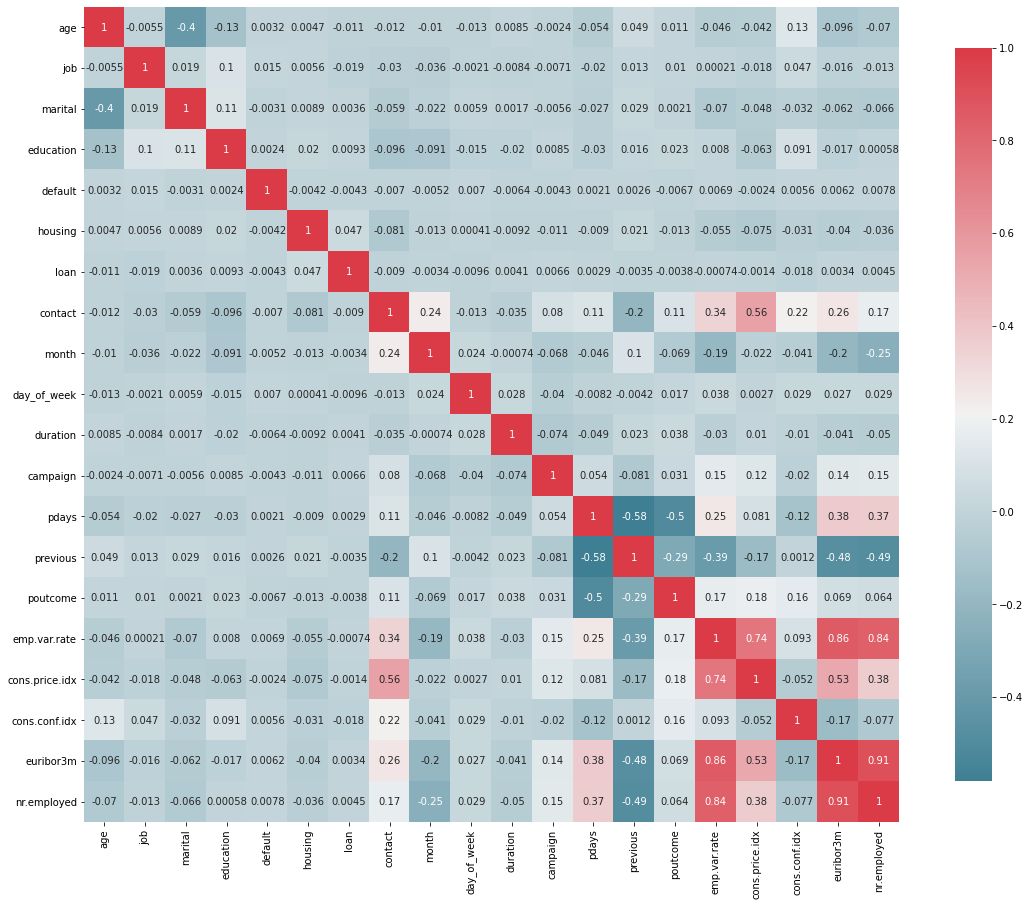

In [4]:
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 20 , 15 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 10 }
    )
    
plot_correlation_map(data.iloc[:,1:-1])

<AxesSubplot:xlabel='education', ylabel='Density'>

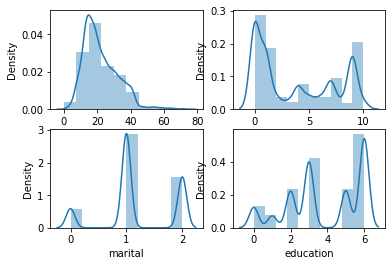

In [5]:
fig, ax = plt.subplots()

ax1 = plt.subplot(2, 2, 1)
sns.distplot(data['age'], bins=10, kde=True)

ax2 = plt.subplot(2, 2, 2)
sns.distplot(data['job'], bins=10, kde=True)

ax3 = plt.subplot(2, 2, 3)
sns.distplot(data['marital'], bins=10, kde=True)

ax4 = plt.subplot(2, 2, 4)
sns.distplot(data['education'], bins=10, kde=True)

In [6]:
uncorr_data = data.drop(['euribor3m','nr.employed'], axis = 1)

X = uncorr_data.iloc[:,1:-1].values
Y = uncorr_data.iloc[:,-1].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [8]:
# Reduce feature dimension
pca = PCA(n_components=15)
train_data_pca = pca.fit_transform(X_train)
test_data_pca = pca.fit_transform(X_test)

In [10]:
MLPNN = MLPClassifier(activation = 'logistic', learning_rate = 'adaptive', max_iter = 1000, verbose = False)
MLPNN.fit(X_train, Y_train)

Y_pred = MLPNN.predict(X_test)

print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))
print('accuracy of MLPNN:', accuracy_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      5362
           1       0.62      0.48      0.54       736

    accuracy                           0.90      6098
   macro avg       0.78      0.72      0.74      6098
weighted avg       0.89      0.90      0.90      6098

[[5145  217]
 [ 382  354]]
accuracy of MLPNN: 0.9017710724827812


In [11]:
NB = GaussianNB()
NB.fit(X_train, Y_train)

Y_pred = NB.predict(X_test)
    
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))
print('accuracy of NB:', accuracy_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      5362
           1       0.39      0.53      0.45       736

    accuracy                           0.84      6098
   macro avg       0.66      0.71      0.68      6098
weighted avg       0.87      0.84      0.85      6098

[[4759  603]
 [ 343  393]]
accuracy of NB: 0.8448671695637914


In [12]:
SVM = SVC()
SVM.fit(X_train, Y_train)

Y_pred = SVM.predict(X_test)

print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))
print('accuracy of SVM:', accuracy_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      5362
           1       0.62      0.35      0.45       736

    accuracy                           0.90      6098
   macro avg       0.77      0.66      0.69      6098
weighted avg       0.88      0.90      0.88      6098

[[5204  158]
 [ 479  257]]
accuracy of SVM: 0.8955395211544769


In [13]:
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train, Y_train)

Y_pred = KNN.predict(X_test)
    
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))
print('accuracy of KNN:', accuracy_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      5362
           1       0.55      0.39      0.46       736

    accuracy                           0.89      6098
   macro avg       0.74      0.67      0.70      6098
weighted avg       0.87      0.89      0.88      6098

[[5128  234]
 [ 449  287]]
accuracy of KNN: 0.8879960642833716


In [14]:
DT = DecisionTreeClassifier()
DT.fit(X_train, Y_train)

Y_pred = DT.predict(X_test)
    
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))
print('accuracy of DT:', accuracy_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      5362
           1       0.48      0.51      0.49       736

    accuracy                           0.87      6098
   macro avg       0.70      0.71      0.71      6098
weighted avg       0.88      0.87      0.87      6098

[[4953  409]
 [ 364  372]]
accuracy of DT: 0.8732371269268613


In [15]:
MLPNN_score = MLPNN.predict_proba(X_test)
NB_score = NB.predict_proba(X_test)
SVM_score = SVM.decision_function(X_test)
KNN_score = KNN.predict_proba(X_test)
DT_score = DT.predict_proba(X_test)

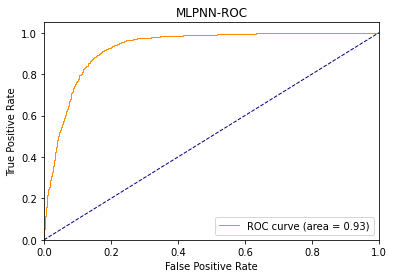

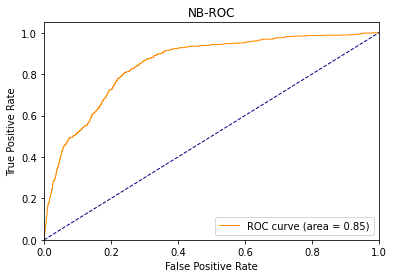

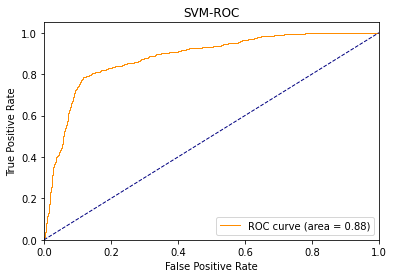

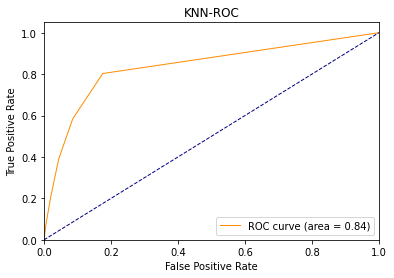

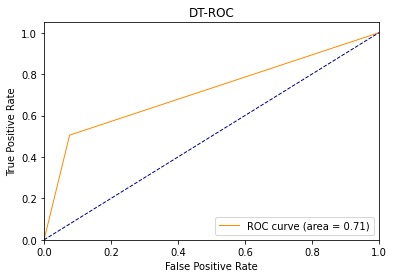

In [19]:
for real_score, title in [
    [MLPNN_score, 'MLPNN-ROC'],
    [NB_score, 'NB-ROC'],
    [SVM_score, 'SVM-ROC'],
    [KNN_score, 'KNN-ROC'],
    [DT_score, 'DT-ROC']
]:
    fpr = dict()
    tpr = dict()
    roc_auc = dict()        
    for i in range(2):
        if title != 'SVM-ROC':
            score = real_score[:, i]
        else:
            score = real_score
        fpr[i], tpr[i], _ = roc_curve(Y_test, score)
        roc_auc[i] = auc(fpr[i], tpr[i])
        
    lw = 1
    plt.plot(fpr[1], tpr[1], color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()